# Lesson 1
### 37 Mixed Breeds of Cats and Dogs

* To reload any edits to the libraries automatically
* matplotlib's output to be shown in the notebook itself

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

* All the necessary packages of fastaiv1 
* Vision for image based tasks

In [2]:
from fastai import *
from fastai.vision import *

## Dataset
Using Oxford-IIIT Pet Dataset with 12 breeds of Cats and 25 breeds of Dogs

### untar_data()
* untar_data() downloads and unzip it while download_data just downalods a zip
* it returns the path it was downloaded to
* default path is .fastai/data/

In [3]:
doc(untar_data)

untar_data [source] untar_data ( url : str , fname : PathOrStr = None , dest : PathOrStr = None , data = True ) 
 
 Download url if it doesn't exist to fname and un-tgz to folder dest 
 Show in docs

In [4]:
path = untar_data(url = URLs.PETS) 
path

PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet')

### ls() 
* shows the files in the directory of the invoking object

In [5]:
path.ls()

[PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/annotations')]

Pathlib.posixPath are new addition to python 

In [6]:
anno_path = path/'annotations'
img_path = path/'images'

### labels

* There are many ways of mapping data and labels - folder name as label, file name as label etc
* Lets look into pets data and how are they mapped

### get_image_files

* gets list of all file names of the images in the specified path


In [7]:
fnames = get_image_files(img_path)
fnames[:5]

[PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_105.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/Bengal_131.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/Sphynx_38.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/havanese_84.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/scottish_terrier_1.jpg')]

* We know now that the labels are the file names

### ImageDataBunch

* Class having that holds the data for learner train/test/valid


### from_name_re()

* method under ImageDataBunch which deals with data having labels in the filename
* which can be extracted to Regex thus the name from_name_re <br>
param 1 is the path of the images <br>
param 2 list file names of the images <br>
param 3 regex pattern <br>
param 4 <br>
param 5 <br>
param 6 

### normalize()

* normalize the data to simialar scale <br>
param imagenet_stats -> normalize according to imagenet data's stats


### show_batch()

* to see the data in respected datatype <br>
param 1 nxn matrix of data <br>
param 2 size of the figure

### classes()

* gives the classes that is found using the regex pattern 

### c()

* no. of classification classes for cllasification prob

In [8]:
pat = re.compile(r'/([^/]+)_\d+.jpg$')
data = ImageDataBunch.from_name_re(img_path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

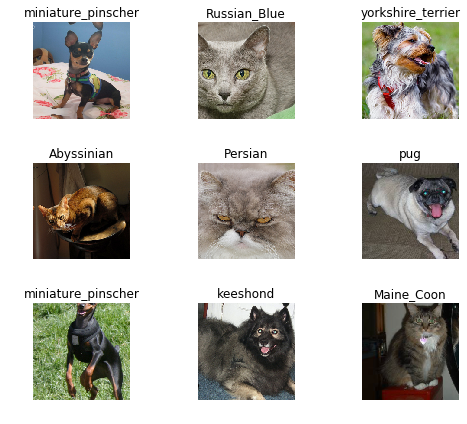

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)
len(data.classes),data.c

['Egyptian_Mau', 'Bengal', 'Sphynx', 'havanese', 'scottish_terrier', 'american_bulldog', 'newfoundland', 'chihuahua', 'Ragdoll', 'japanese_chin', 'Birman', 'beagle', 'Abyssinian', 'yorkshire_terrier', 'great_pyrenees', 'wheaten_terrier', 'Bombay', 'samoyed', 'boxer', 'pug', 'shiba_inu', 'Persian', 'leonberger', 'english_setter', 'german_shorthaired', 'Maine_Coon', 'miniature_pinscher', 'english_cocker_spaniel', 'pomeranian', 'saint_bernard', 'Russian_Blue', 'British_Shorthair', 'staffordshire_bull_terrier', 'keeshond', 'american_pit_bull_terrier', 'Siamese', 'basset_hound']


(37, 37)

## Training

### create_cnn()

* creates a convolution learner <br>
param 1 databunch object <br>
param 2 here resenet 34 pretrained weights are loaded and head is added newly with fresh weights <br>
param 3 metrics

### load() save()

* load and save weights with parameter as file name

### fit_one_cycle()

In [11]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [12]:
learn.fit_one_cycle(4)

Total time: 03:41
epoch  train_loss  valid_loss  accuracy
1      1.170426    0.290446    0.909337  (01:00)
2      0.504375    0.224990    0.923545  (00:54)
3      0.300012    0.202401    0.925575  (00:53)
4      0.222134    0.187192    0.934371  (00:53)



In [13]:
learn.save('1')

## Visulizing Results

Checking out prediction results to know what were the top losses, which classification were most confused and the confusion matrix

### ClassificationInterpretation 

* Class for interpretation methods to visualize incorrect classfication

### from_learner()

* Creates a object of the ClassificationInterpretation with parameters to specify which learner, TTA(Test Time Augmenattion) if needed.

### plot_top_losses()

* Show the images with information top with the following <br>
format **prediction_class/actual_class/loss/probability_of_actual_class** <br>
param 1 no. of top losses to be displayed 
param 2 size of the image

### plot_confusion_matrix()

* plot for all the classes y is actual and x is predicted 

### most_confused()

* gives only the list of tuples **actual, predicted, no. of times confused** <br>
param1 mentions the threshold for the min no. of confusions

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

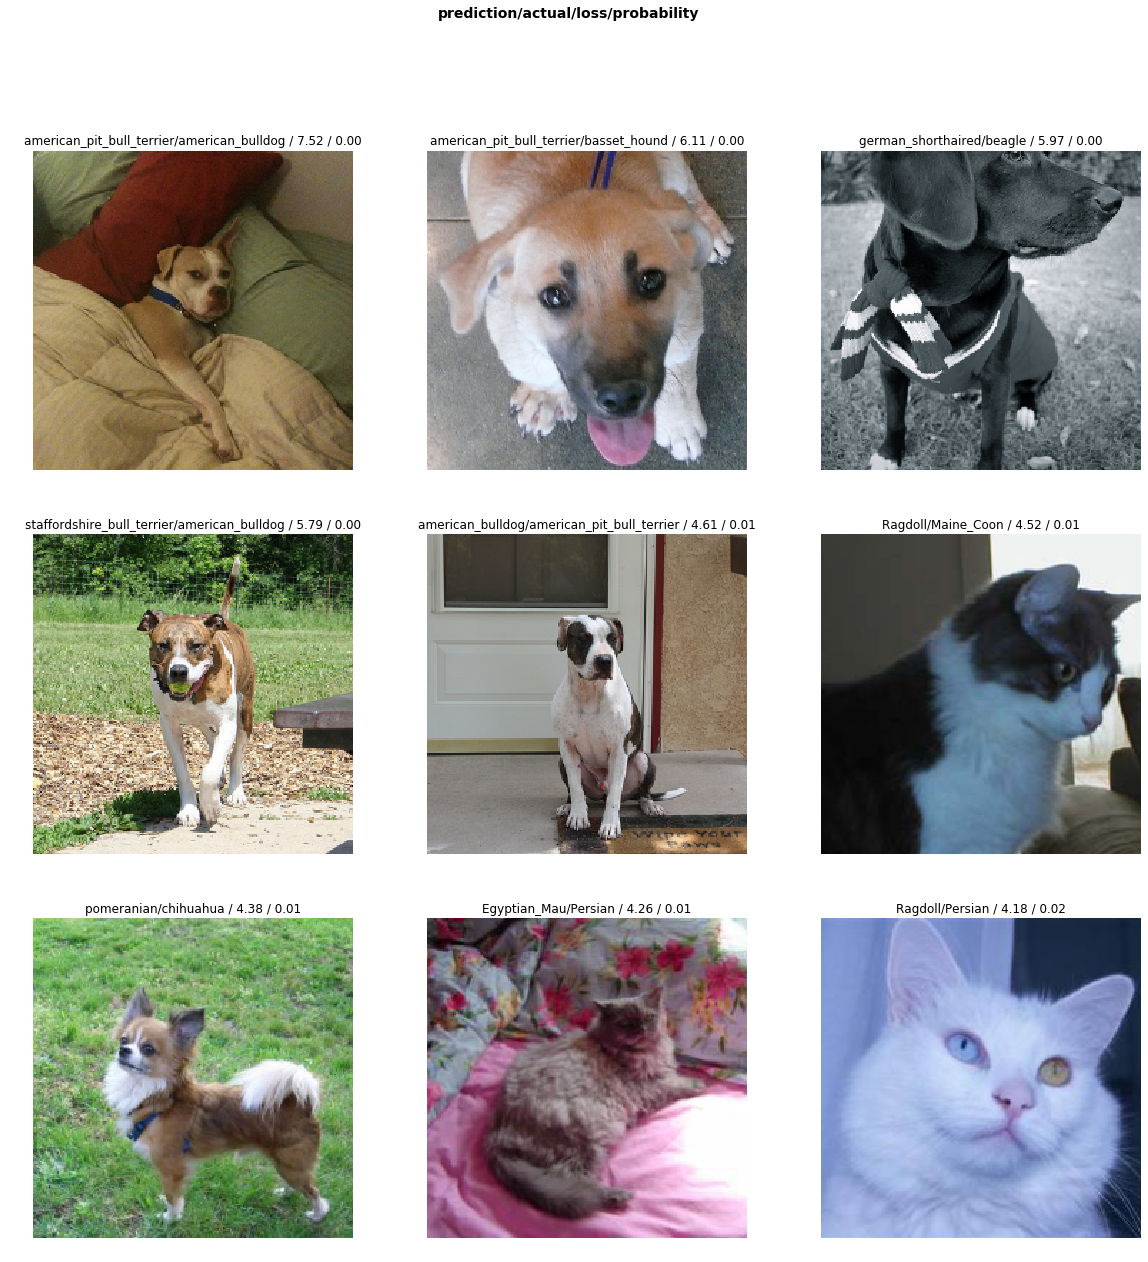

In [21]:
interp.plot_top_losses(9, figsize=(20,20))

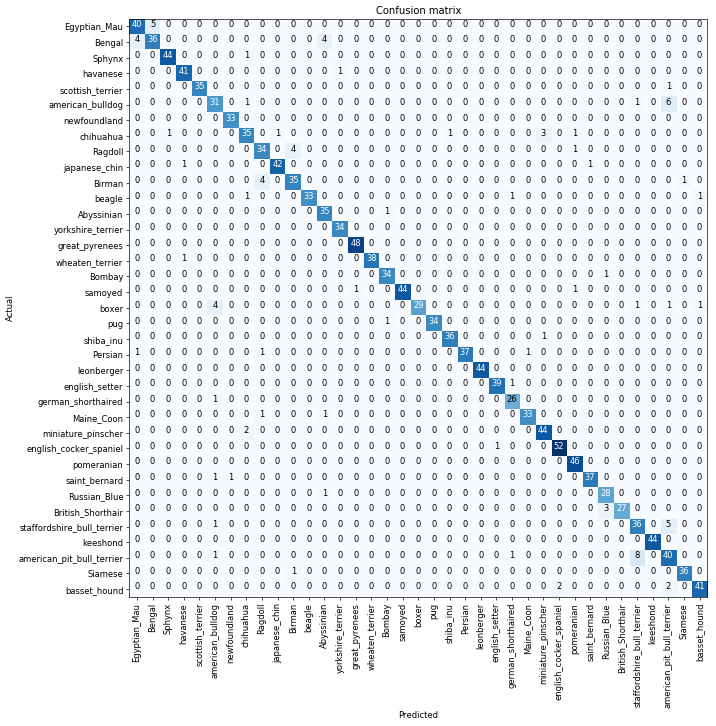

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('american_bulldog', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Bengal', 'Abyssinian', 4),
 ('Ragdoll', 'Birman', 4),
 ('Birman', 'Ragdoll', 4),
 ('boxer', 'american_bulldog', 4),
 ('chihuahua', 'miniature_pinscher', 3),
 ('British_Shorthair', 'Russian_Blue', 3)]

## Fine Tuning

### unfreeze()

* when a pre trained model is loaded the weights of the starting layers are forzen to updation only the new layer that is added will change, with unfreezing it releases this

### lr_find()

* explore range of learning rates to and plot the chnages of the loss for the models reacts which are recored to **recoder** and can be plotted with **plot()** and are reverted <br>
learn <br> start_lr(default 1e-7) <br> end_lr(default 10) <br> num_it(default 100)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


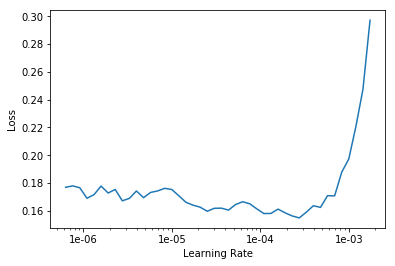

In [29]:
learn.recorder.plot()

In [34]:
learn.load('1')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (5912 items)
[Category Egyptian_Mau, Category Bengal, Category Sphynx, Category havanese, Category scottish_terrier]...
Path: /home/siddhant/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 427, 450), Image (3, 202, 300), Image (3, 401, 500), Image (3, 500, 333), Image (3, 500, 417)]...
Path: /home/siddhant/.fastai/data/oxford-iiit-pet/images;
Valid: LabelList
y: CategoryList (1478 items)
[Category great_pyrenees, Category wheaten_terrier, Category wheaten_terrier, Category Maine_Coon, Category english_cocker_spaniel]...
Path: /home/siddhant/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 381, 480), Image (3, 492, 500), Image (3, 375, 500), Image (3, 500, 335), Image (3, 375, 500)]...
Path: /home/siddhant/.fastai/data/oxford-iiit-pet/images;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=F

In [35]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(2, max_lr=slice(3e-6, 3e-4))

Total time: 02:17
epoch  train_loss  valid_loss  accuracy
1      0.165247    0.186722    0.937754  (01:08)
2      0.135828    0.183425    0.940460  (01:08)



## Training 2

* Resnet 50
* size 299


In [66]:
data = ImageDataBunch.from_name_re(img_path, fnames, pat, ds_tfms=get_transforms(), size=299, bs=32).normalize(imagenet_stats)

In [67]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [68]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 175.88 MiB (GPU 0; 11.17 GiB total capacity; 10.05 GiB already allocated; 50.19 MiB free; 774.33 MiB cached)

In [ ]:
learn.fit_one_cycle(8)

In [59]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(3e-3,3e-2))

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: 